<a href="https://colab.research.google.com/github/joshiadvait8/paper/blob/master/road_codition_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
from keras.applications.resnet50 import ResNet50
base_model=ResNet50(include_top=False, weights='imagenet',input_shape=(256,256,3), pooling='max')

In [0]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/My Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/My Dataset/test/Plain/1.jpg
/content/drive/My Drive/My Dataset/test/Plain/8.jpg
/content/drive/My Drive/My Dataset/test/Plain/2.jpg
/content/drive/My Drive/My Dataset/test/Plain/3.jpg
/content/drive/My Drive/My Dataset/test/Plain/4.jpg
/content/drive/My Drive/My Dataset/test/Plain/7.jpg
/content/drive/My Drive/My Dataset/test/Plain/6.jpg
/content/drive/My Drive/My Dataset/test/Plain/5.jpg
/content/drive/My Drive/My Dataset/test/Pothole/531.jpg
/content/drive/My Drive/My Dataset/test/Pothole/593.jpg
/content/drive/My Drive/My Dataset/test/Pothole/598.jpg
/content/drive/My Drive/My Dataset/test/Pothole/618.jpg
/content/drive/My Drive/My Dataset/test/Pothole/610.jpg
/content/drive/My Drive/My Dataset/test/Pothole/602.jpg
/content/drive/My Drive/My Dataset/test/Pothole/605.jpg
/content/drive/My Drive/My Dataset/test/Pothole/617.jpg
/content/drive/My Drive/My Dataset/train/Plain/2.jpg
/content/drive/My Drive/My Dataset/train/Plain/11.jpg
/content/drive/My Drive/My Da

In [0]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import keras.preprocessing.image as img
from keras.applications.resnet50 import ResNet50

Using TensorFlow backend.


In [0]:
os.listdir('/content/drive/My Drive/My Dataset/train')

['Plain', 'Pothole']

In [0]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    
        X.append(np.array(img))
        Z.append(str(label))


In [0]:
X=[]
Z=[]
IMG_SIZE=256
Plain='/content/drive/My Drive/My Dataset/train/Plain'
Pothole='/content/drive/My Drive/My Dataset/train/Pothole'

make_train_data('Plain',Plain)
make_train_data('Pothole',Pothole)

NameError: ignored

In [0]:
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(10,10)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

NameError: ignored

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1337)

np.random.seed(42)
rn.seed(42)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [0]:
base_model=ResNet50(include_top=False, weights='imagenet',input_shape=(256,256,3), pooling='max')














94658560/94653016 [==============================] - 1s 0us/step


In [0]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.20))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))


In [0]:
epochs=10
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
base_model.trainable=True # setting the VGG model to be trainable.
model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 1026      
Total params: 30,408,066
Trainable params: 30,354,946
Non-trainable params: 53,120
_____________________________________

In [0]:
History = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test,y_test))

Train on 30 samples, validate on 10 samples
Epoch 1/10
30/30 [==============================] - 51s 2s/step - loss: 2.9156 - acc: 0.6667 - val_loss: 2.9785 - val_acc: 0.4000
Epoch 2/10
30/30 [==============================] - 33s 1s/step - loss: 1.5108 - acc: 0.6333 - val_loss: 2.1128 - val_acc: 0.6000
Epoch 3/10
30/30 [==============================] - 33s 1s/step - loss: 0.5879 - acc: 0.7667 - val_loss: 1.7871 - val_acc: 0.7000
Epoch 4/10
30/30 [==============================] - 33s 1s/step - loss: 0.6909 - acc: 0.8000 - val_loss: 1.6378 - val_acc: 0.7000
Epoch 5/10
30/30 [==============================] - 33s 1s/step - loss: 0.1841 - acc: 0.9667 - val_loss: 1.5408 - val_acc: 0.7000
Epoch 6/10
30/30 [==============================] - 33s 1s/step - loss: 0.0489 - acc: 0.9667 - val_loss: 1.4885 - val_acc: 0.7000
Epoch 7/10
30/30 [==============================] - 33s 1s/step - loss: 0.0360 - acc: 0.9667 - val_loss: 1.4589 - val_acc: 0.7000
Epoch 8/10
30/30 [============================

In [0]:
model.save('/content/drive/My Drive/My Dataset/cnn resne50 model/model.h5')

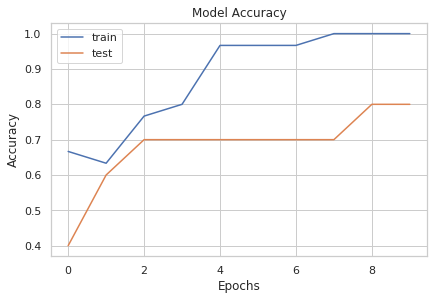

In [0]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

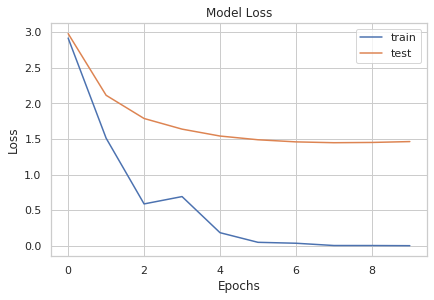

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [0]:
path = "/content/drive/My Drive/My Dataset/test/Pothole"
files = os.listdir(path)
files

['531.jpg',
 '593.jpg',
 '598.jpg',
 '618.jpg',
 '610.jpg',
 '602.jpg',
 '605.jpg',
 '617.jpg']

  0%|          | 0/8 [00:00<?, ?it/s]

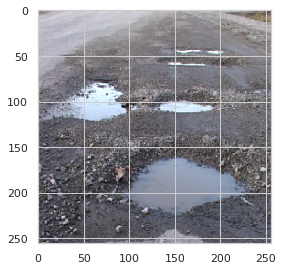

 12%|█▎        | 1/8 [00:04<00:34,  5.00s/it]

Pothole Road


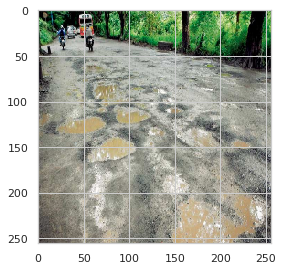

 25%|██▌       | 2/8 [00:06<00:23,  3.87s/it]

Pothole Road


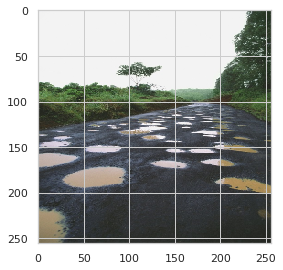

 38%|███▊      | 3/8 [00:07<00:15,  3.04s/it]

Pothole Road


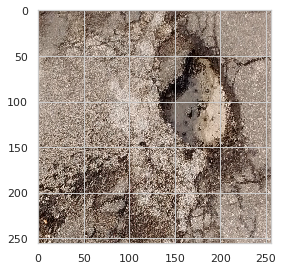

 50%|█████     | 4/8 [00:08<00:10,  2.54s/it]

Pothole Road


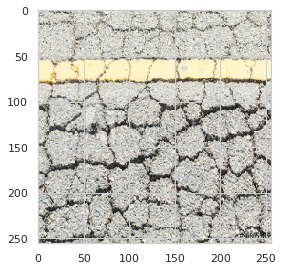

 62%|██████▎   | 5/8 [00:09<00:06,  2.10s/it]

Pothole Road


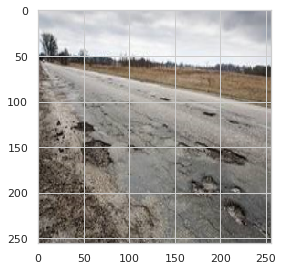

 75%|███████▌  | 6/8 [00:10<00:03,  1.79s/it]

Pothole Road


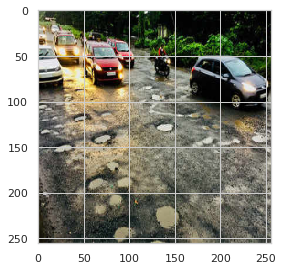

 88%|████████▊ | 7/8 [00:11<00:01,  1.60s/it]

Pothole Road


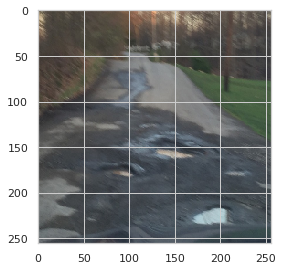

100%|██████████| 8/8 [00:13<00:00,  1.46s/it]

Pothole Road


In [0]:
for i in tqdm(files):
    pth = os.path.join(path,i)
    X = cv2.imread(pth,cv2.IMREAD_COLOR)
    X = cv2.resize(X,(256,256))
    plt.figure()
    plt.imshow(X[:,:,::-1]) 
    plt.show()  

    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    y_pred = np.round(model.predict(X))
    if y_pred[0][0] == 1:
        print("Plain Road")
    else:
        print("Pothole Road")

In [0]:
path = "/content/drive/My Drive/My Dataset/test/Plain"
files = os.listdir(path)
files

['1.jpg', '8.jpg', '2.jpg', '3.jpg', '4.jpg', '7.jpg', '6.jpg', '5.jpg']

  0%|          | 0/8 [00:00<?, ?it/s]

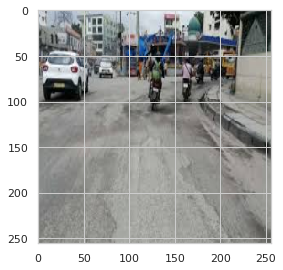

 12%|█▎        | 1/8 [00:01<00:08,  1.23s/it]

Pothole Road


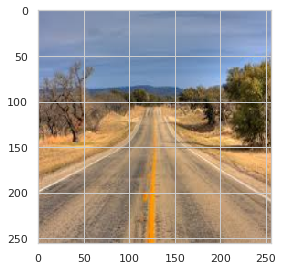

 25%|██▌       | 2/8 [00:02<00:07,  1.19s/it]

Plain Road


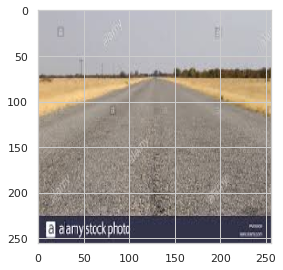

 38%|███▊      | 3/8 [00:03<00:05,  1.16s/it]

Plain Road


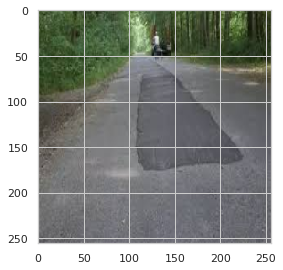

 50%|█████     | 4/8 [00:04<00:04,  1.14s/it]

Pothole Road


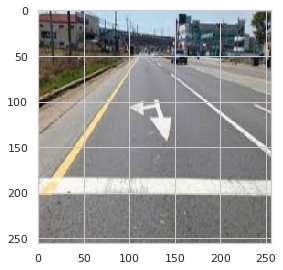

 62%|██████▎   | 5/8 [00:05<00:03,  1.13s/it]

Pothole Road


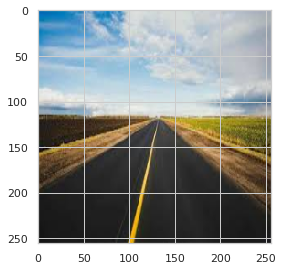

 75%|███████▌  | 6/8 [00:06<00:02,  1.12s/it]

Pothole Road


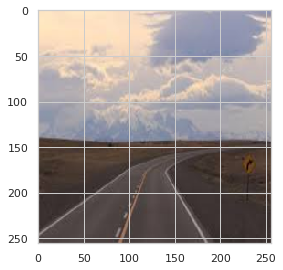

 88%|████████▊ | 7/8 [00:07<00:01,  1.10s/it]

Pothole Road


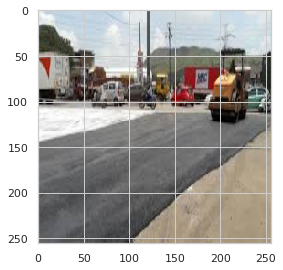

100%|██████████| 8/8 [00:08<00:00,  1.10s/it]

Pothole Road


In [0]:
for i in tqdm(files):
    pth = os.path.join(path,i)
    X = cv2.imread(pth,cv2.IMREAD_COLOR)
    X = cv2.resize(X,(256,256))
    plt.figure()
    plt.imshow(X[:,:,::-1]) 
    plt.show()  


    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    y_pred = np.round(model.predict(X))
    if y_pred[0][0] == 1:
        print("Plain Road")
    else:
        print("Pothole Road")

In [0]:
path = "/content/drive/My Drive/My Dataset/validation"
files = os.listdir(path)
files

['8.jpg',
 '2.jpg',
 '3.jpg',
 '1.jpg',
 '9.jpg',
 '602.jpg',
 '7.jpg',
 '6.jpg',
 '10.jpg',
 '4.jpg']

  0%|          | 0/10 [00:00<?, ?it/s]

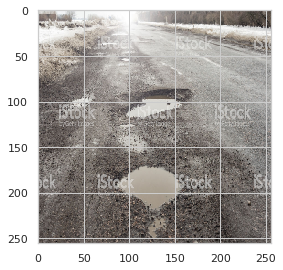

 10%|█         | 1/10 [00:00<00:06,  1.42it/s]

Pothole Road


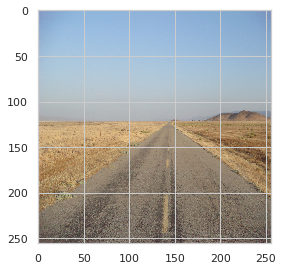

 20%|██        | 2/10 [00:01<00:06,  1.33it/s]

Plain Road


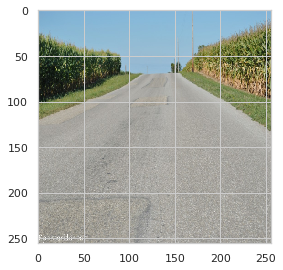

 30%|███       | 3/10 [00:02<00:05,  1.36it/s]

Plain Road


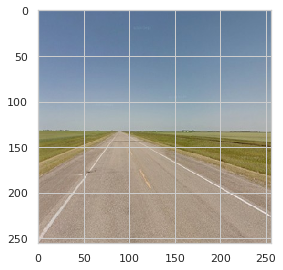

 40%|████      | 4/10 [00:02<00:04,  1.39it/s]

Plain Road


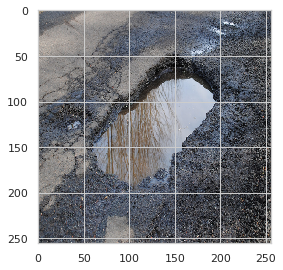

 50%|█████     | 5/10 [00:03<00:03,  1.40it/s]

Pothole Road


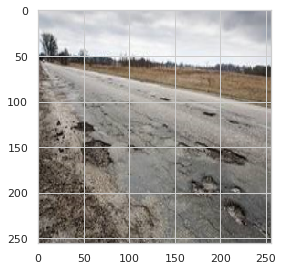

 60%|██████    | 6/10 [00:04<00:02,  1.42it/s]

Pothole Road


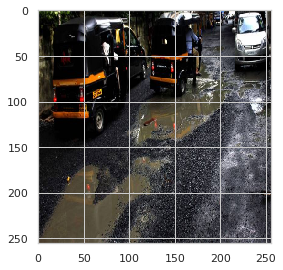

 70%|███████   | 7/10 [00:05<00:02,  1.42it/s]

Pothole Road


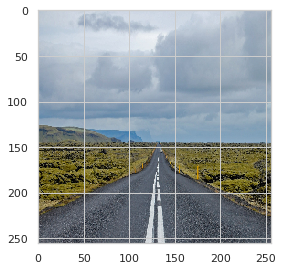

 80%|████████  | 8/10 [00:05<00:01,  1.38it/s]

Plain Road


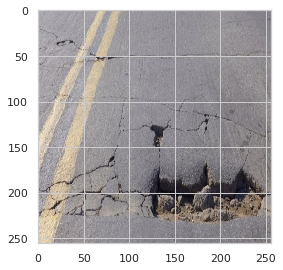

 90%|█████████ | 9/10 [00:06<00:00,  1.41it/s]

Pothole Road


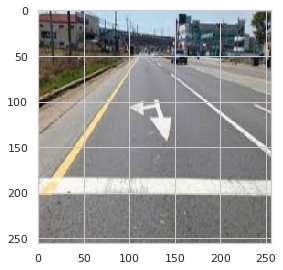

100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

Pothole Road


In [0]:
umar = []
for i in tqdm(files):
    pth = os.path.join(path,i)
    X = cv2.imread(pth,cv2.IMREAD_COLOR)
    X = cv2.resize(X,(256,256))
    plt.figure()
    plt.imshow(X[:,:,::-1]) 
    plt.show()  


    X = np.array(X)
    X = np.expand_dims(X, axis=0)
    y_pred = np.round(model.predict(X))
    if y_pred[0][0] == 1:
        print("Plain Road")
        umar.append("Plain Road")

    else:
        print("Pothole Road")
        umar.append("Pothole Road")

In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3 1]
 [1 5]]
None


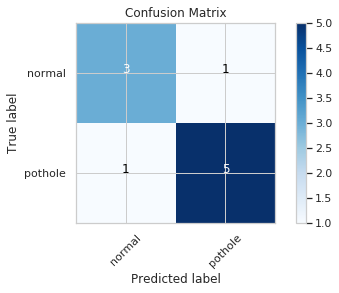

In [0]:
import sklearn.metrics as metrics
labels = ['normal','pothole']
y_true_labels = ['Plain Road','Plain Road','Plain Road','Pothole Road','Pothole Road','Pothole Road','Pothole Road','Plain Road','Pothole Road','Pothole Road']
cm = metrics.confusion_matrix(y_true=y_true_labels, y_pred=umar)
pcm=plot_confusion_matrix(cm,labels,title='Confusion Matrix')
print(pcm)
